# Random Forest

- A random forest is a machine learning algorithm that combines the output of multiple decision trees to reach a single result.
- Used for both classification and regression problems
- Robost to outliers by effectively using outlier detection
  - Each decision tree only considers a subset of features and instances, so outliers have less impact on the model's overall performance.
- Leverages the power of multiple decision trees by introducing randomness in the training process, which results in a more robust and accurate model
  - Bootstrap Sampling: Each tree is trained on a random subset of the training data, sampled with replacement data. This means that some data points may be repeated in a subset, while others may be left out
  - Random Feature Selection: When splitting a node, each tree considers a random subset of the features rather than all features.

<img src="random-forest.png" width="500"/>

## Example:
- Scenario: Predicting whether someone will buy a product based on age, income, and education level
- Tree Split: Trees are trained on separate data that is randomly sampled
- Random Feature Selection: For each node split, a random subset of features is selected.
   - The first tree might split on age and income
   - The second tree might split on income and education level
   - The third tree might split on age and education level
- Result:
   - If tree 1 and tree 2 predicts yes and tree 3 predicts no, the random forest will predict Yes for this person

### Research Question:
Can the business predict monthly charges for telecommunication customers?
- The goal is to develop a random forest model that uses regression to help the company predict their customer's monthly cost.
- Understanding how the company can tune spending will help get the best recommendation for a course of action.
- A random forest is being used instead of decision trees because it is a combination of multiple predictions that will improve accuracy and reduce overfitting..
   - Overfitting: The model learns underlying patterns in the training data, but also includes noise and outliers, which could impact the results of the model
        - This results in the model predicting the training set accurately, but when using new data, it's unable to generalize the patterns

### Data
- **Churn:** Defined as the percentage of customers who stopped using a provider's product or service during a certain time frame
- The data set includes information about the following:
     - Customers who left within the last month
     - Services that each customer signed up for
     - Customer account information
     - Customer demographics
- In the data set, there are also **item#** columns that contain information from a scale of 1 to 8 (1 = most important, 8 = least important)
     - Item1: Timely response
     - Item2: Timely fixes
     - Item3: Timely replacements
     - Item4: Reliability
     - Item5: Options
     - Item6: Respectful response
     - Item7: Courteous exchange
     - Item8: Evidence of active listening

### Import Data

In [1]:
import pandas as pd

df = pd.read_csv('Datasets/churn_clean.csv')

In [2]:
pd.options.display.max_columns = None


In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Data Preprocessing
- Replace null values
- Handle outliers
- Encode variables
- Correlation between variables

### Replace Null Values

In [5]:
df['InternetService'].mode()

0    Fiber Optic
Name: InternetService, dtype: object

In [6]:
import warnings
warnings.filterwarnings("ignore")
df['InternetService'].fillna('Fiber Optic', inplace=True)

### Breaking the columns down
- **Possible Outliers:** Columns with number as a data type
- **High Cardinality:** Columns like IDs or categories that won't allow us to generalize a pattern
- **Needs Encoding:** Columns that have low cardinality and needs encoding for the model
- **Good to Go:** Columns that have a numeric data type but won't have outliers due to being a scale

In [7]:
#make lists of data types.  check numeric for outliers, objects for encoding & cardinality
possibleoutliers = df[['Lat','Lng','Population','Children', 'Age','Income','Outage_sec_perweek',
                       'Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
highcardinality = df[['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','TimeZone','Job']]
needsencoding = df[['Area','Marital','Gender','Churn','Techie','Contract','Port_modem','Tablet','InternetService',
                    'Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                    'StreamingMovies','PaperlessBilling','PaymentMethod']]
goodtogo = df[['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']]

**Since the info function returned almost all non-nulls, we need to ensure there isn't another value that represents 'null' (ex: 0)**
- Population: Population within a mile radius of customer, based on census data
- Children: Number of children in customer's household as reported in sign-up information
- Contacts: Number of times customer contacted technical support
- Yearly_equip_failure: The number of times customer's equipement failed and had to be reset/replaced in the past year

In [8]:
df.isin([0]).sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                97
Area                       0
TimeZone                   0
Job                        0
Children                2570
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                3680
Yearly_equip_failure    6727
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

We can handle the 0 values with nan for `Population` by doing so:

In [9]:
import numpy as np

df.Population.replace(0, np.nan, inplace=True)

#check that NaNs were added
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population              97
Area                     0
TimeZone                 0
Job                      0
Children                 0
Age                      0
Income                   0
Marital                  0
Gender                   0
Churn                    0
Outage_sec_perweek       0
Email                    0
Contacts                 0
Yearly_equip_failure     0
Techie                   0
Contract                 0
Port_modem               0
Tablet                   0
InternetService          0
Phone                    0
Multiple                 0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
P

<Axes: >

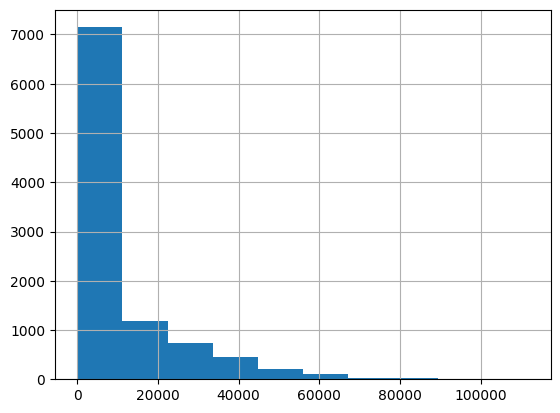

In [10]:
df['Population'].hist()

**Replace null values in `Population` with the median since there is a right skew in the distribution**

In [11]:
#treat NaNs
df['Population'].fillna(df['Population'].median(), inplace=True)

In [12]:
#check for null placeholders like -1
df.isin([-1]).sum() #no missingness

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [13]:
#check for null placeholders '?', 'N/A'
for col in df:
    if df[col].dtype.name == 'object' and df[col].nunique() < 10000:
        print(df[col].value_counts()) 
        #no other missingness detected
        #not checking unique columns for missingness because they will be omitted anyway.


City
Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clarkesville     1
Name: count, Length: 6058, dtype: int64
State
TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: count, dtype: int64
County
Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Rooks            1
Cochise          1
Yauco            1
Hoke            

### Outliers in numerical variables
- This process is standard in EDA, however, since the random forest analysis is robust to outliers, we don't have to remove them.

In [14]:
#check for outliers with describe
possibleoutliers.describe(percentiles=[.01, .05, .1, .25, .5, .75, .90, .95, .99]) 

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
1%,25.960625,-143.749576,4.000000,0.0000,18.000000,3174.911600,3.015347,5.000000,0.000000,0.000000,1.338371,92.455140,389.104774
5%,29.725587,-121.149900,102.950000,0.0000,21.000000,7503.760500,5.099282,7.000000,0.000000,0.000000,2.368222,112.455100,628.740407
10%,31.854840,-115.239730,211.000000,0.0000,25.000000,10933.561000,6.164412,8.000000,0.000000,0.000000,3.677483,119.712645,812.261821
25%,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370


### Boxplots to visualize outliers

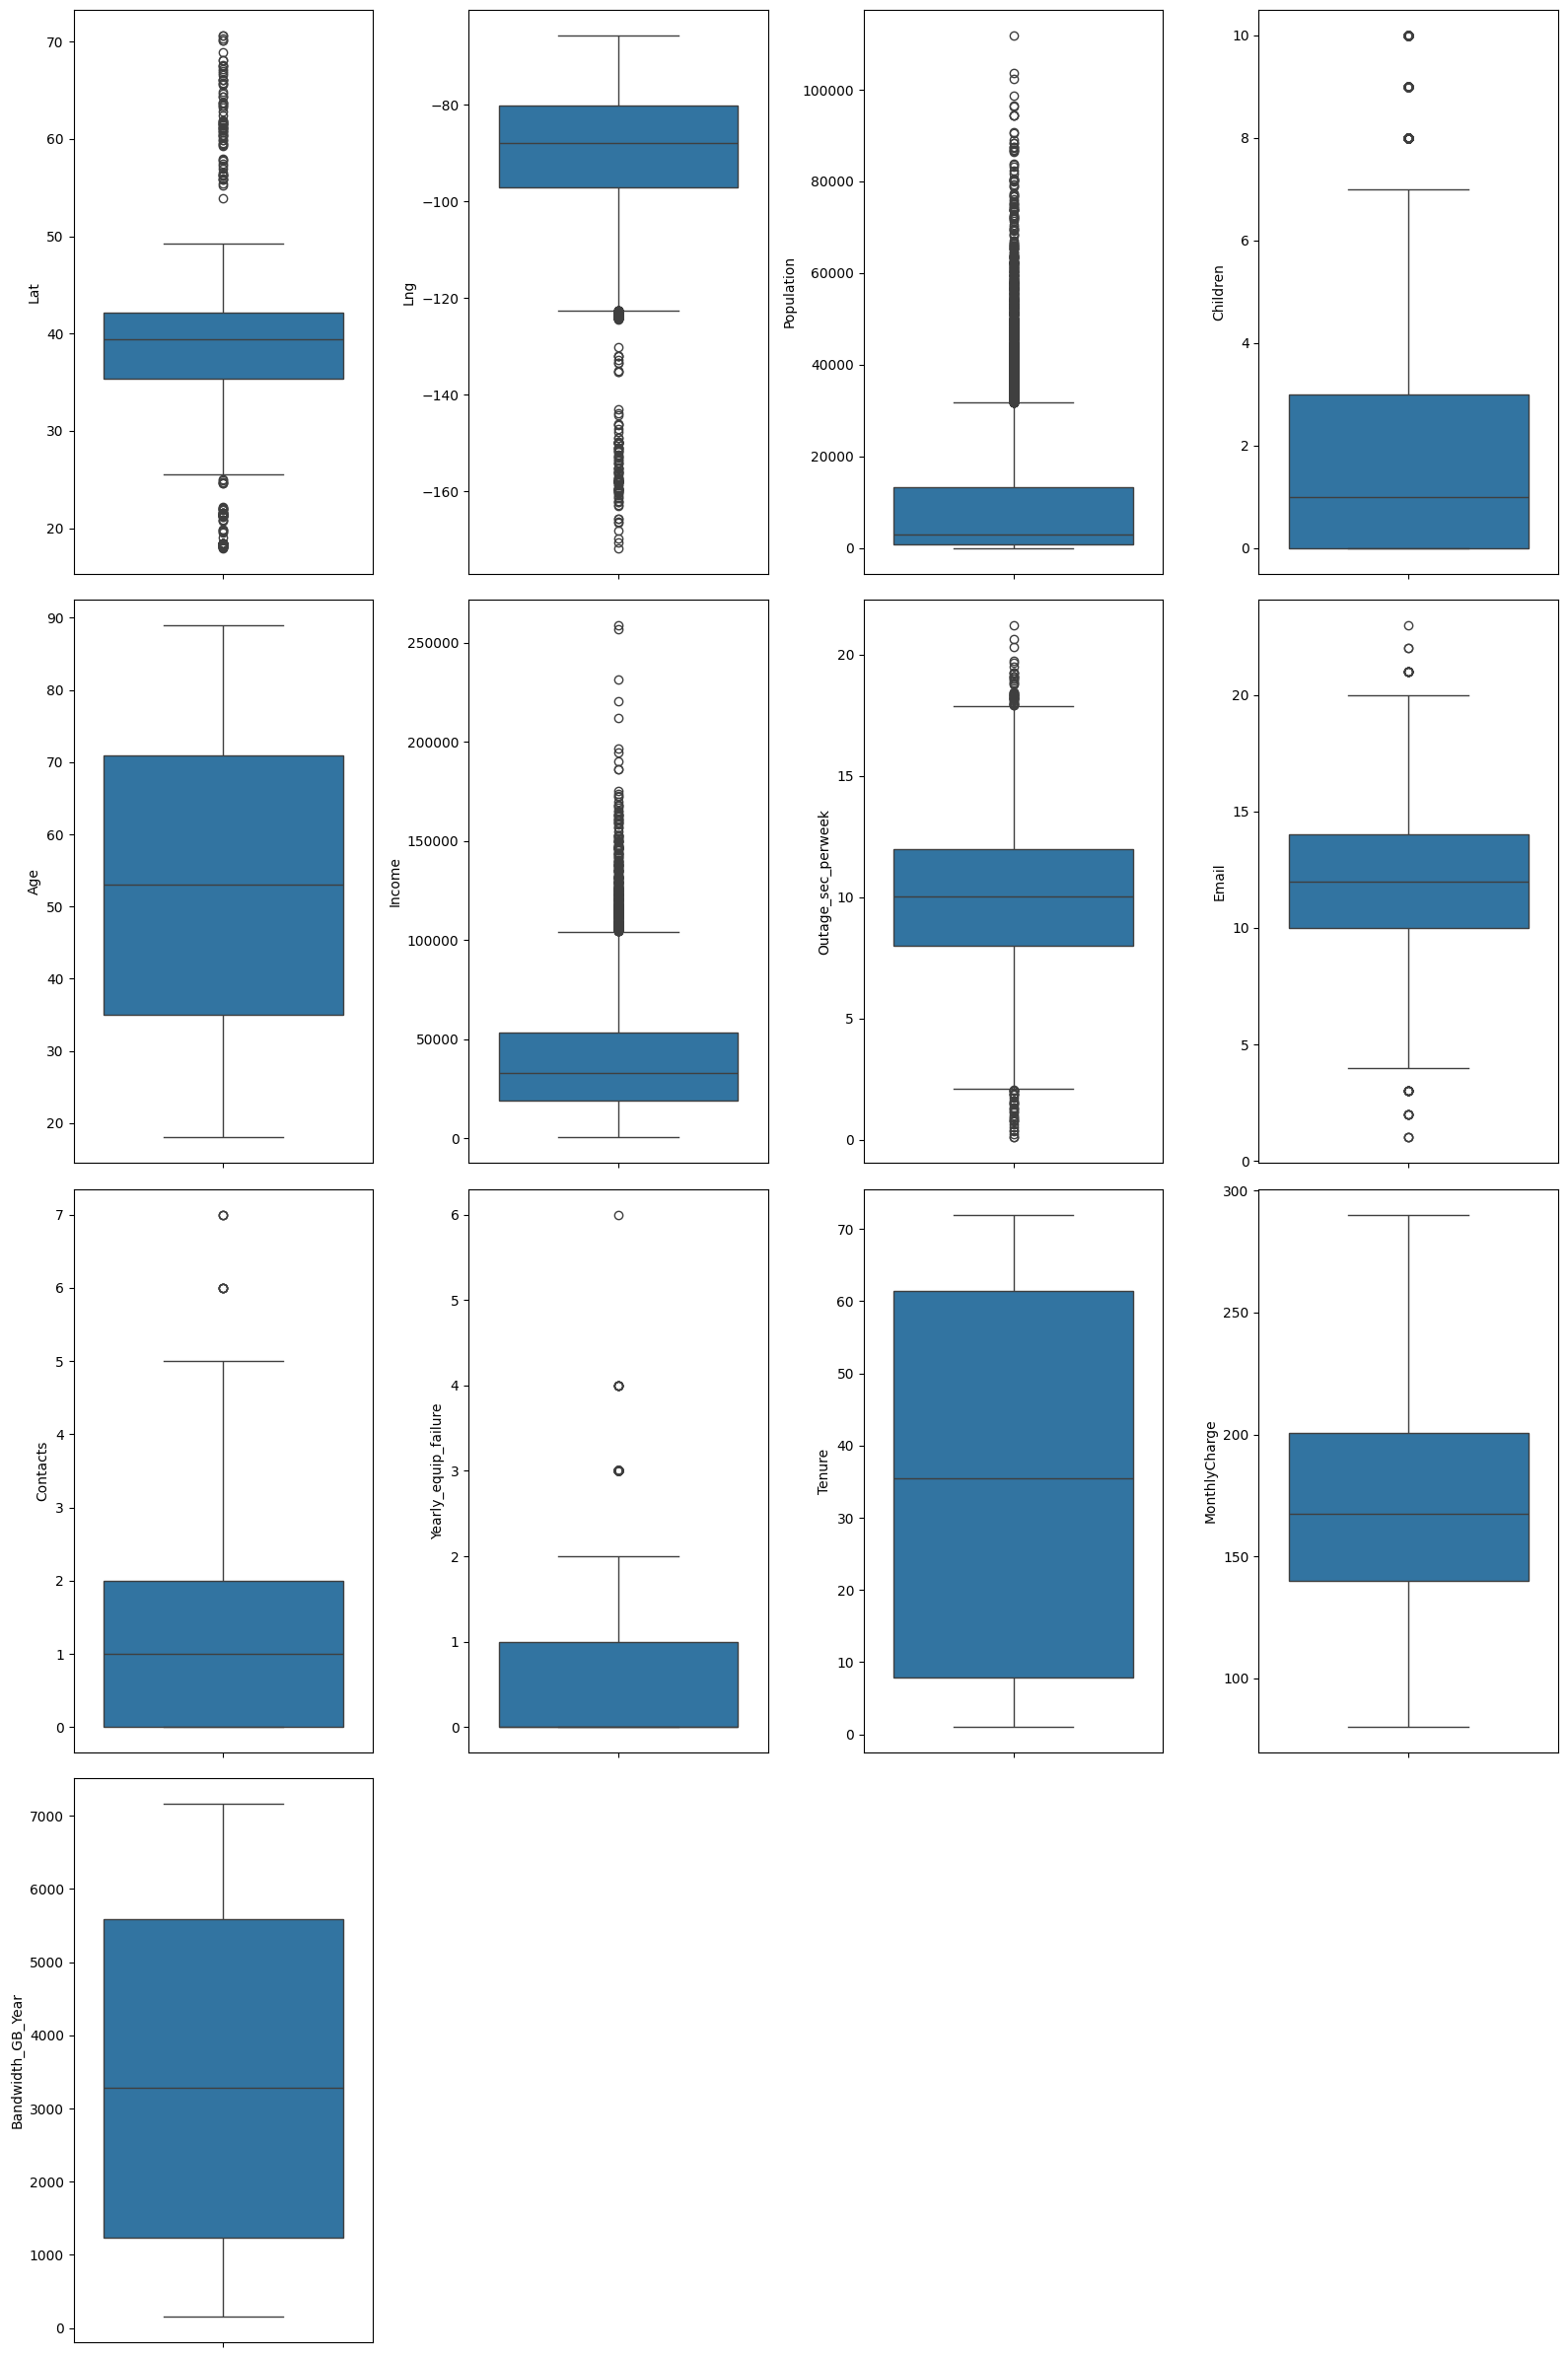

In [15]:
import matplotlib.pyplot as plt #figures, subplots
import seaborn as sns #boxplots, heatmap


#visualize boxplots for possible outliers
plt.figure(figsize=(16,24))

for i,col in enumerate(possibleoutliers.columns.tolist()):    
    plt.subplot(4,4,i + 1)
    sns.boxplot(y=col, data=df)


plt.tight_layout()

plt.show()

### Cardinality in categorical variables
- **Curse of Dimensionality:** As more dimensions are added to the dataset, the volume of the space increases exponentionally, making data sparse.
     - This leads to data sparsity, making clustering and classification more challenging
     - It can cause overfitting, making the model overly complex, fitting to noise

**Print how many unique categories exist for each column**
- All of these columns have high cardinality, so they should be dropped from the dataset

In [16]:
#evaluation of 'highcardinality'
for col in highcardinality:
    print(highcardinality[col].name)
    print(highcardinality[col].nunique())

CaseOrder
10000
Customer_id
10000
Interaction
10000
UID
10000
City
6058
State
52
County
1620
Zip
8583
TimeZone
25
Job
639


**We can confirm that there is low cardinality in all of these columns, so they should be kept in the dataset**

In [17]:
#evaluation of 'needsencoding'
for col in needsencoding:
    print(needsencoding[col].name)
    print(needsencoding[col].nunique())
    print(needsencoding[col].unique())
#all of these have low enough dimensionality to use either binary or dummy encoding

Area
3
['Urban' 'Suburban' 'Rural']
Marital
5
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender
3
['Male' 'Female' 'Nonbinary']
Churn
2
['No' 'Yes']
Techie
2
['No' 'Yes']
Contract
3
['One year' 'Month-to-month' 'Two Year']
Port_modem
2
['Yes' 'No']
Tablet
2
['Yes' 'No']
InternetService
2
['Fiber Optic' 'DSL']
Phone
2
['Yes' 'No']
Multiple
2
['No' 'Yes']
OnlineSecurity
2
['Yes' 'No']
OnlineBackup
2
['Yes' 'No']
DeviceProtection
2
['No' 'Yes']
TechSupport
2
['No' 'Yes']
StreamingTV
2
['No' 'Yes']
StreamingMovies
2
['Yes' 'No']
PaperlessBilling
2
['Yes' 'No']
PaymentMethod
4
['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']


### Variable Encoding

**Binary Encoding**

In [18]:
for col in df:
    if df[col].dtype.name == 'object' and df[col].nunique() == 2 and col != 'InternetService':
        df[col] = df[col].map({'Yes': 1, 'No': 0})


In [19]:
df['Churn'].value_counts()

Churn
0    7350
1    2650
Name: count, dtype: int64

**Dummy Encoding**

In [21]:
for col in df:
    if df[col].dtype.name == 'object' and df[col].nunique() <= 5:
        print(df[col].value_counts())

Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64
Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64
Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64
Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64
InternetService
Fiber Optic    6537
DSL            3463
Name: count, dtype: int64
PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64


In [22]:
df = pd.get_dummies(df, columns=["Area", "Marital", "Gender", "Contract", "InternetService","PaymentMethod"], 
                    prefix=["Area", "Marital", "Gender", "Contract", "Internet","Payment"], drop_first=True)  
# drop first: used to prevent multicollinearity (can predict the dummy variable based on the others)

In [23]:
df['Area_Suburban']

0       False
1       False
2       False
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Area_Suburban, Length: 10000, dtype: bool

In [24]:
df = df.replace({True: 1, False: 0})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CaseOrder                        10000 non-null  int64  
 1   Customer_id                      10000 non-null  object 
 2   Interaction                      10000 non-null  object 
 3   UID                              10000 non-null  object 
 4   City                             10000 non-null  object 
 5   State                            10000 non-null  object 
 6   County                           10000 non-null  object 
 7   Zip                              10000 non-null  int64  
 8   Lat                              10000 non-null  float64
 9   Lng                              10000 non-null  float64
 10  Population                       10000 non-null  float64
 11  TimeZone                         10000 non-null  object 
 12  Job                

In [26]:
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','TimeZone','Job', 'Zip'], axis = 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lat                              10000 non-null  float64
 1   Lng                              10000 non-null  float64
 2   Population                       10000 non-null  float64
 3   Children                         10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   Income                           10000 non-null  float64
 6   Churn                            10000 non-null  int64  
 7   Outage_sec_perweek               10000 non-null  float64
 8   Email                            10000 non-null  int64  
 9   Contacts                         10000 non-null  int64  
 10  Yearly_equip_failure             10000 non-null  int64  
 11  Techie                           10000 non-null  int64  
 12  Port_modem         

# Correlation between variables

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5]),
 [Text(0.5, 0, 'Lat'),
  Text(1.5, 0, 'Lng'),
  Text(2.5, 0, 'Population'),
  Text(3.5, 0, 'Children'),
  Text(4.5, 0, 'Age'),
  Text(5.5, 0, 'Income'),
  Text(6.5, 0, 'Churn'),
  Text(7.5, 0, 'Outage_sec_perweek'),
  Text(8.5, 0, 'Email'),
  Text(9.5, 0, 'Contacts'),
  Text(10.5, 0, 'Yearly_equip_failure'),
  Text(11.5, 0, 'Techie'),
  Text(12.5, 0, 'Port_modem'),
  Text(13.5, 0, 'Tablet'),
  Text(14.5, 0, 'Phone'),
  Text(15.5, 0, 'Multiple'),
  Text(16.5, 0, 'OnlineSecurity'),
  Text(17.5, 0, 'OnlineBackup'),
  Text(18.5, 0, 'DeviceProtection'),
  Text(19.5, 0, 'TechSupport'),
  Text(20.5, 0, 'StreamingTV'),
  Text(21.5, 0, 'StreamingMovies'),
  Text(22.5, 0,

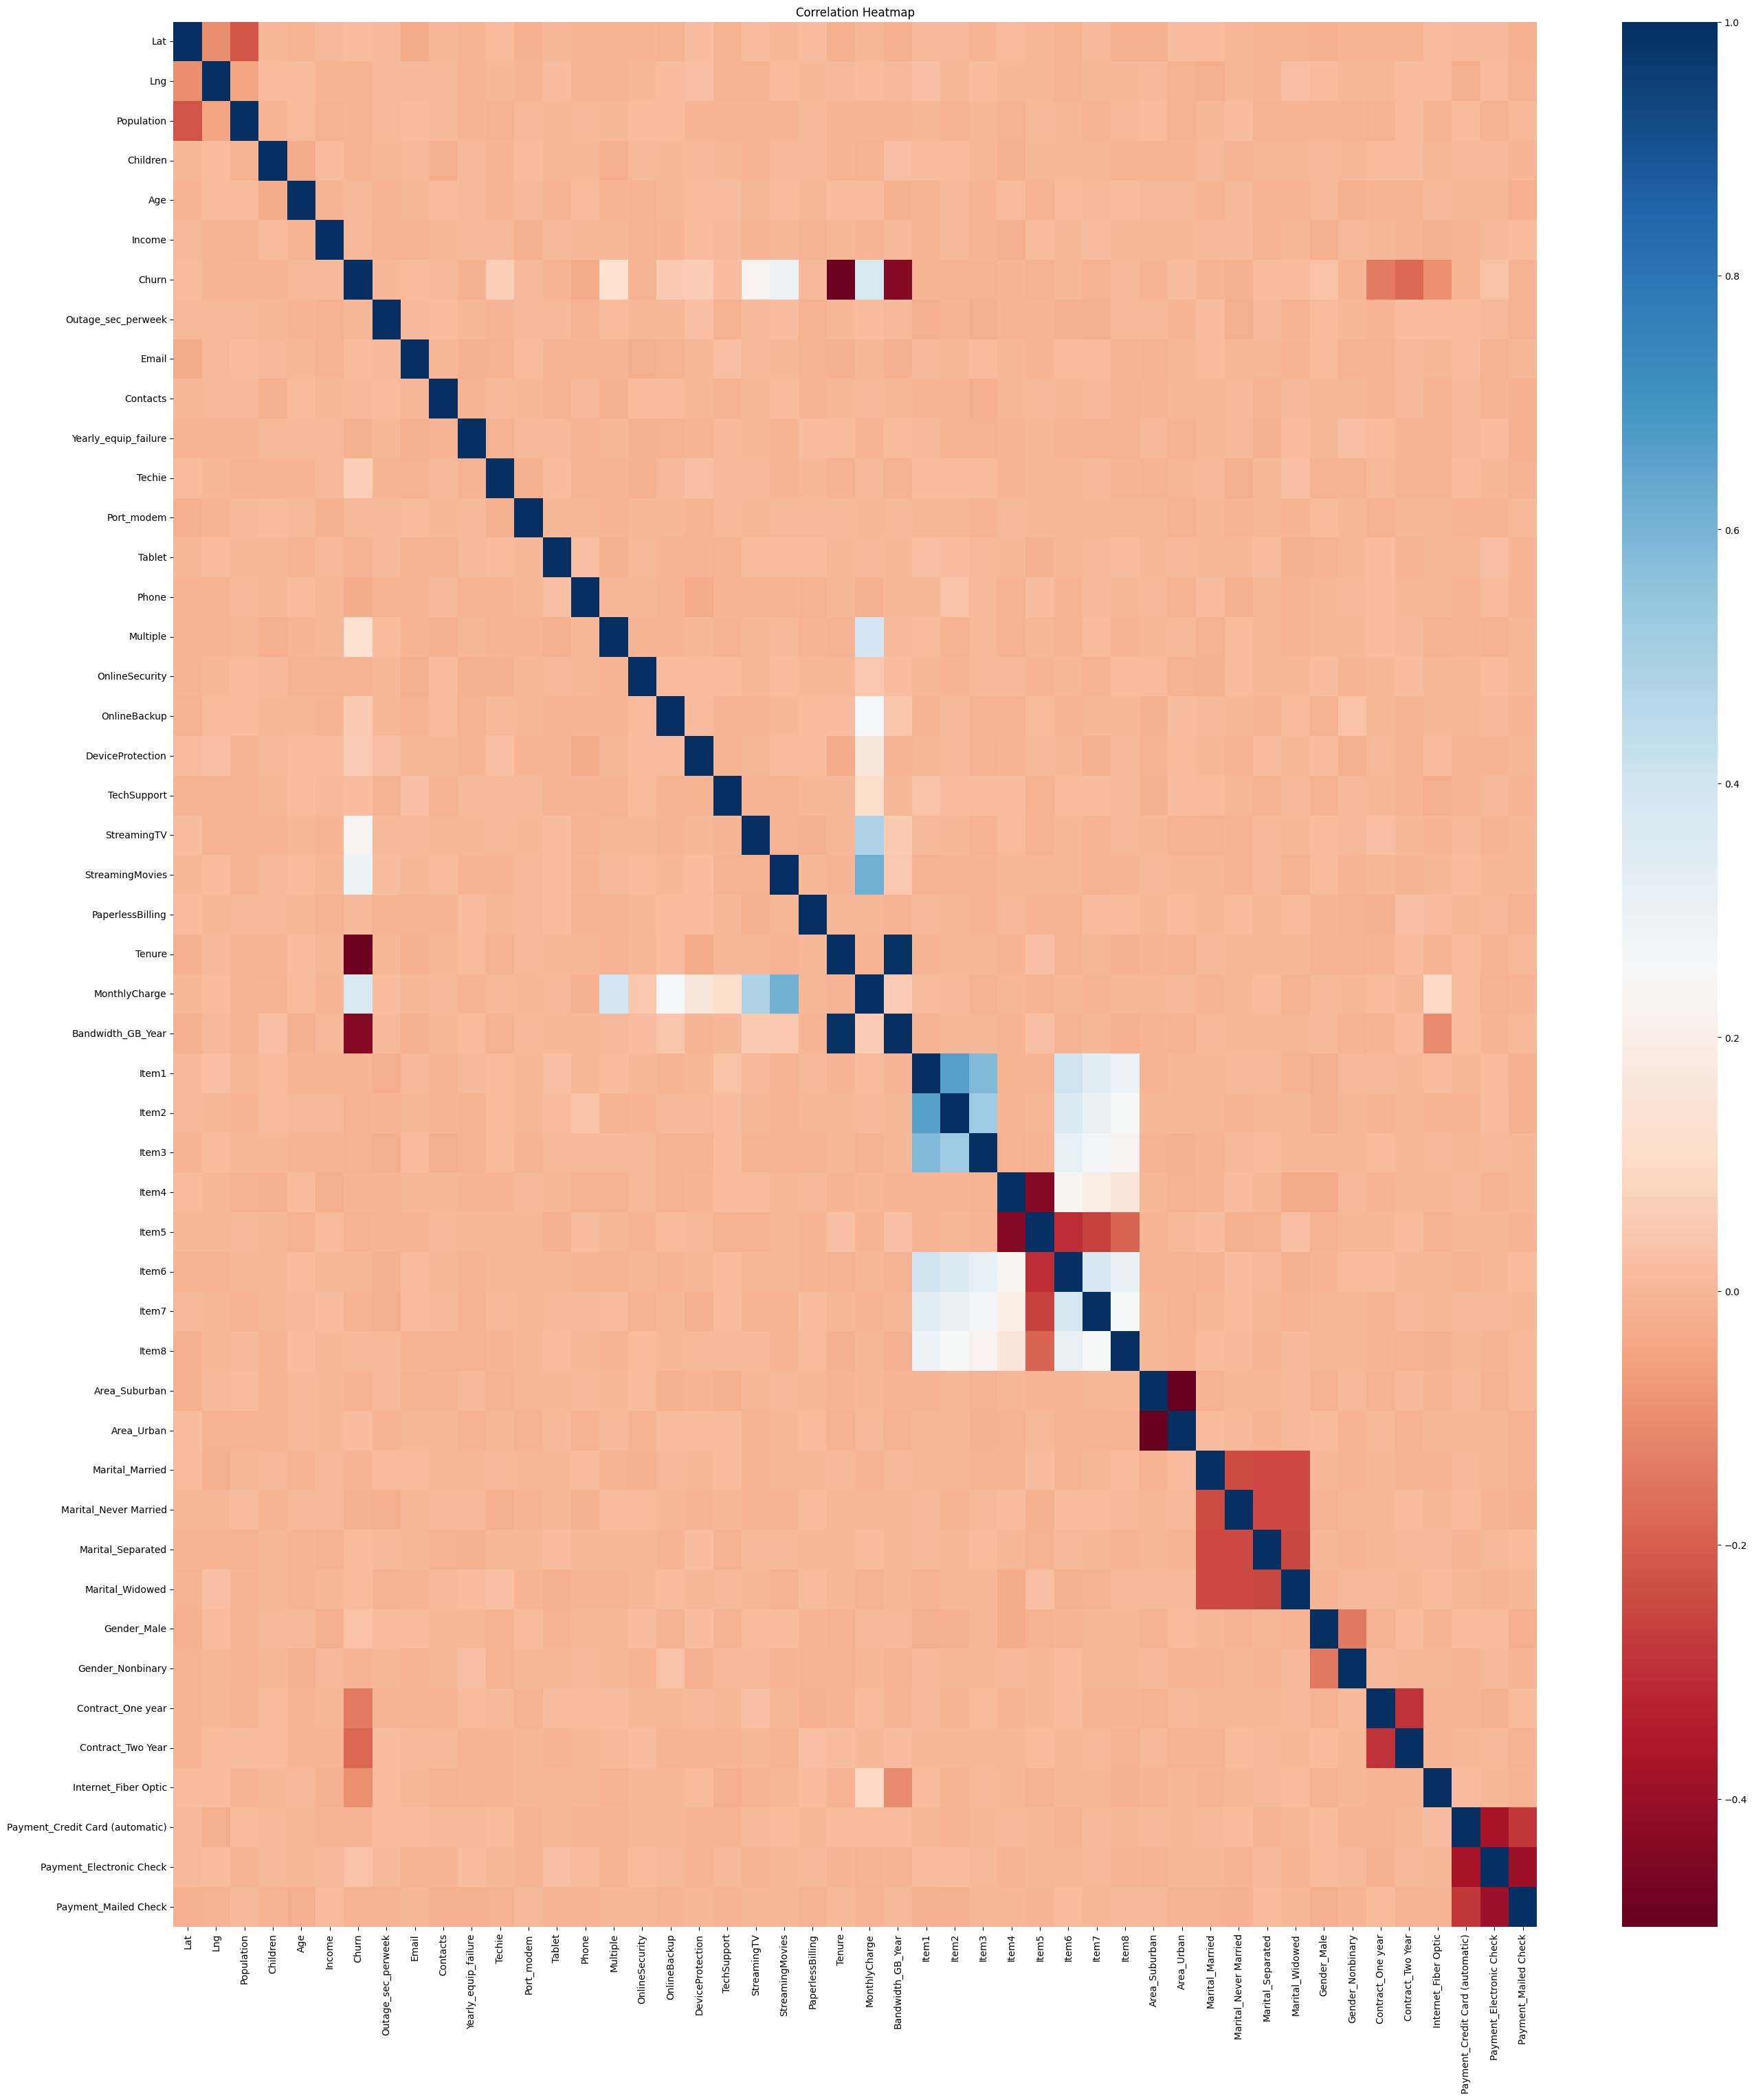

In [41]:
### import seaborn as sns #boxplots, heatmap
import matplotlib.pyplot as plt #figures, subplots

#check for Correlation
plt.subplots(figsize=(32,36))
sns.heatmap(df.corr(),annot=False, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
#tenure and bandwidth gb per year high positive correlation
#lng and zip high negative correlation

In [29]:
#separate X, y
y = df['MonthlyCharge']
X = df.drop(['MonthlyCharge'], axis = 1)
#dropping variables with high cardinality.

<Axes: >

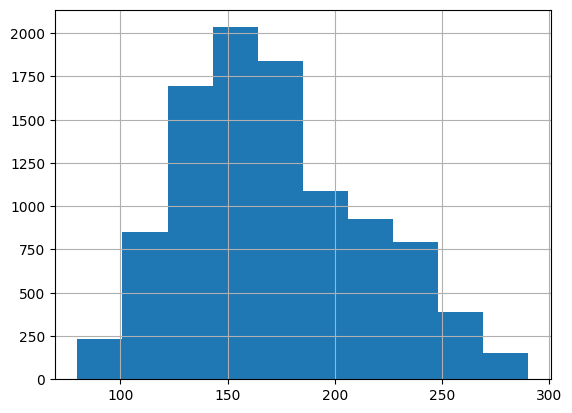

In [30]:
#visualize dependent variable (monthly Charge) distribution
y.hist() #fairly standard distribution bell curve peaking at 150


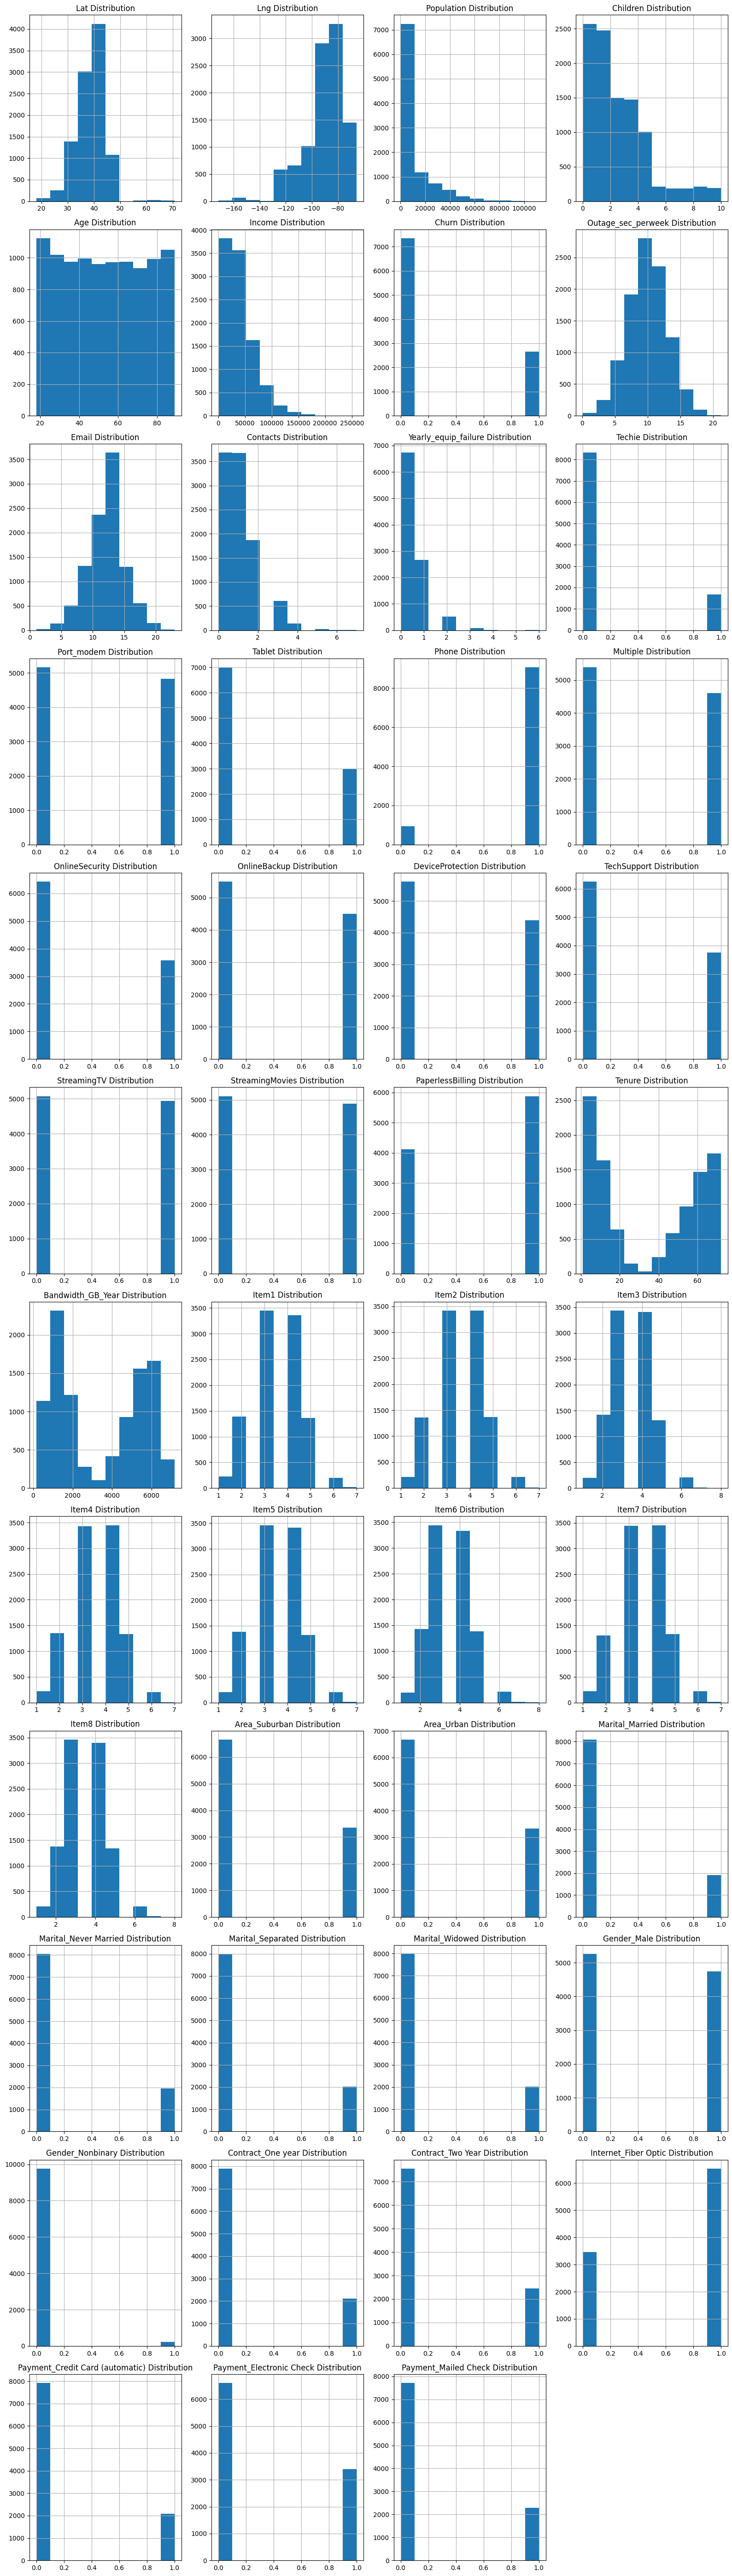

In [31]:
#visualize IV distributions
plt.figure(figsize=(16,56))

for i,col in enumerate(X.columns.tolist()):    
    plt.subplot(12,4,i + 1)
    df[col].hist()
    plt.title(col+" Distribution")
plt.tight_layout()

plt.show()

# Feature Selection
- SelectKBest: Feature selection method used to select the top 'k' features based on a scoring function
- f_regression: Univariate linear regression test returning the p-value for each feature

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression #feature select, pvalues for regression

#instantiate Kbest
skbest = SelectKBest(score_func=f_regression, k='all')

In [33]:
#fit kbest
skbest.fit_transform(X,y)

array([[ 5.6251000e+01, -1.3337571e+02,  3.8000000e+01, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.4328930e+01, -8.4240800e+01,  1.0446000e+04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.5355890e+01, -1.2324657e+02,  3.7350000e+03, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 3.5520390e+01, -1.0044180e+02,  4.0600000e+02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.3580160e+01, -8.5132410e+01,  3.5575000e+04, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.4707830e+01, -8.3536480e+01,  1.2230000e+04, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00]])

##### p-value: How likely the data could have occurred under the null hypothesis
- Each feature has a hypothesis test
   - **Null Hypothesis:** The feature does not affect the `Monthly Charge`
   - **Alternate Hypothesis:** The feature does affect the `Monthly Charge`
- Any feature that has a p-value less than .05 is statistically significant, and we conclude that the feature does affect the `Monthly Charge`

In [34]:
#build dataframe and print results
pvalues = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_})
pvalues.round(5).sort_values('p_value')

,Feature,p_value
17,OnlineBackup,0.00000
21,StreamingMovies,0.00000
20,StreamingTV,0.00000
19,TechSupport,0.00000
18,DeviceProtection,0.00000
16,OnlineSecurity,0.00000
15,Multiple,0.00000
24,Bandwidth_GB_Year,0.00000
43,Internet_Fiber Optic,0.00000
6,Churn,0.00000


In [35]:
#drop insignificant variables (p > .05 ) based on kbest 
X = X.drop(['Phone','Contract_One year','Payment_Credit Card (automatic)','Lng','Marital_Separated','Age','Payment_Electronic Check','Marital_Widowed','Children','Item1','Gender_Male','Item3','Tablet','Techie','Yearly_equip_failure','Marital_Married','Item7','Item5','Population','Area_Urban','Contacts','Item2','Tenure','Income','Item6','Payment_Mailed Check','Area_Suburban','Contract_Two Year','Item8','Email','Gender_Nonbinary','Lat','PaperlessBilling','Marital_Never Married','Item4','Port_modem'], axis = 1)
#automatically gets rid of our mutlicollinearity issues

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Churn'),
  Text(1.5, 0, 'Outage_sec_perweek'),
  Text(2.5, 0, 'Multiple'),
  Text(3.5, 0, 'OnlineSecurity'),
  Text(4.5, 0, 'OnlineBackup'),
  Text(5.5, 0, 'DeviceProtection'),
  Text(6.5, 0, 'TechSupport'),
  Text(7.5, 0, 'StreamingTV'),
  Text(8.5, 0, 'StreamingMovies'),
  Text(9.5, 0, 'Bandwidth_GB_Year'),
  Text(10.5, 0, 'Internet_Fiber Optic')])

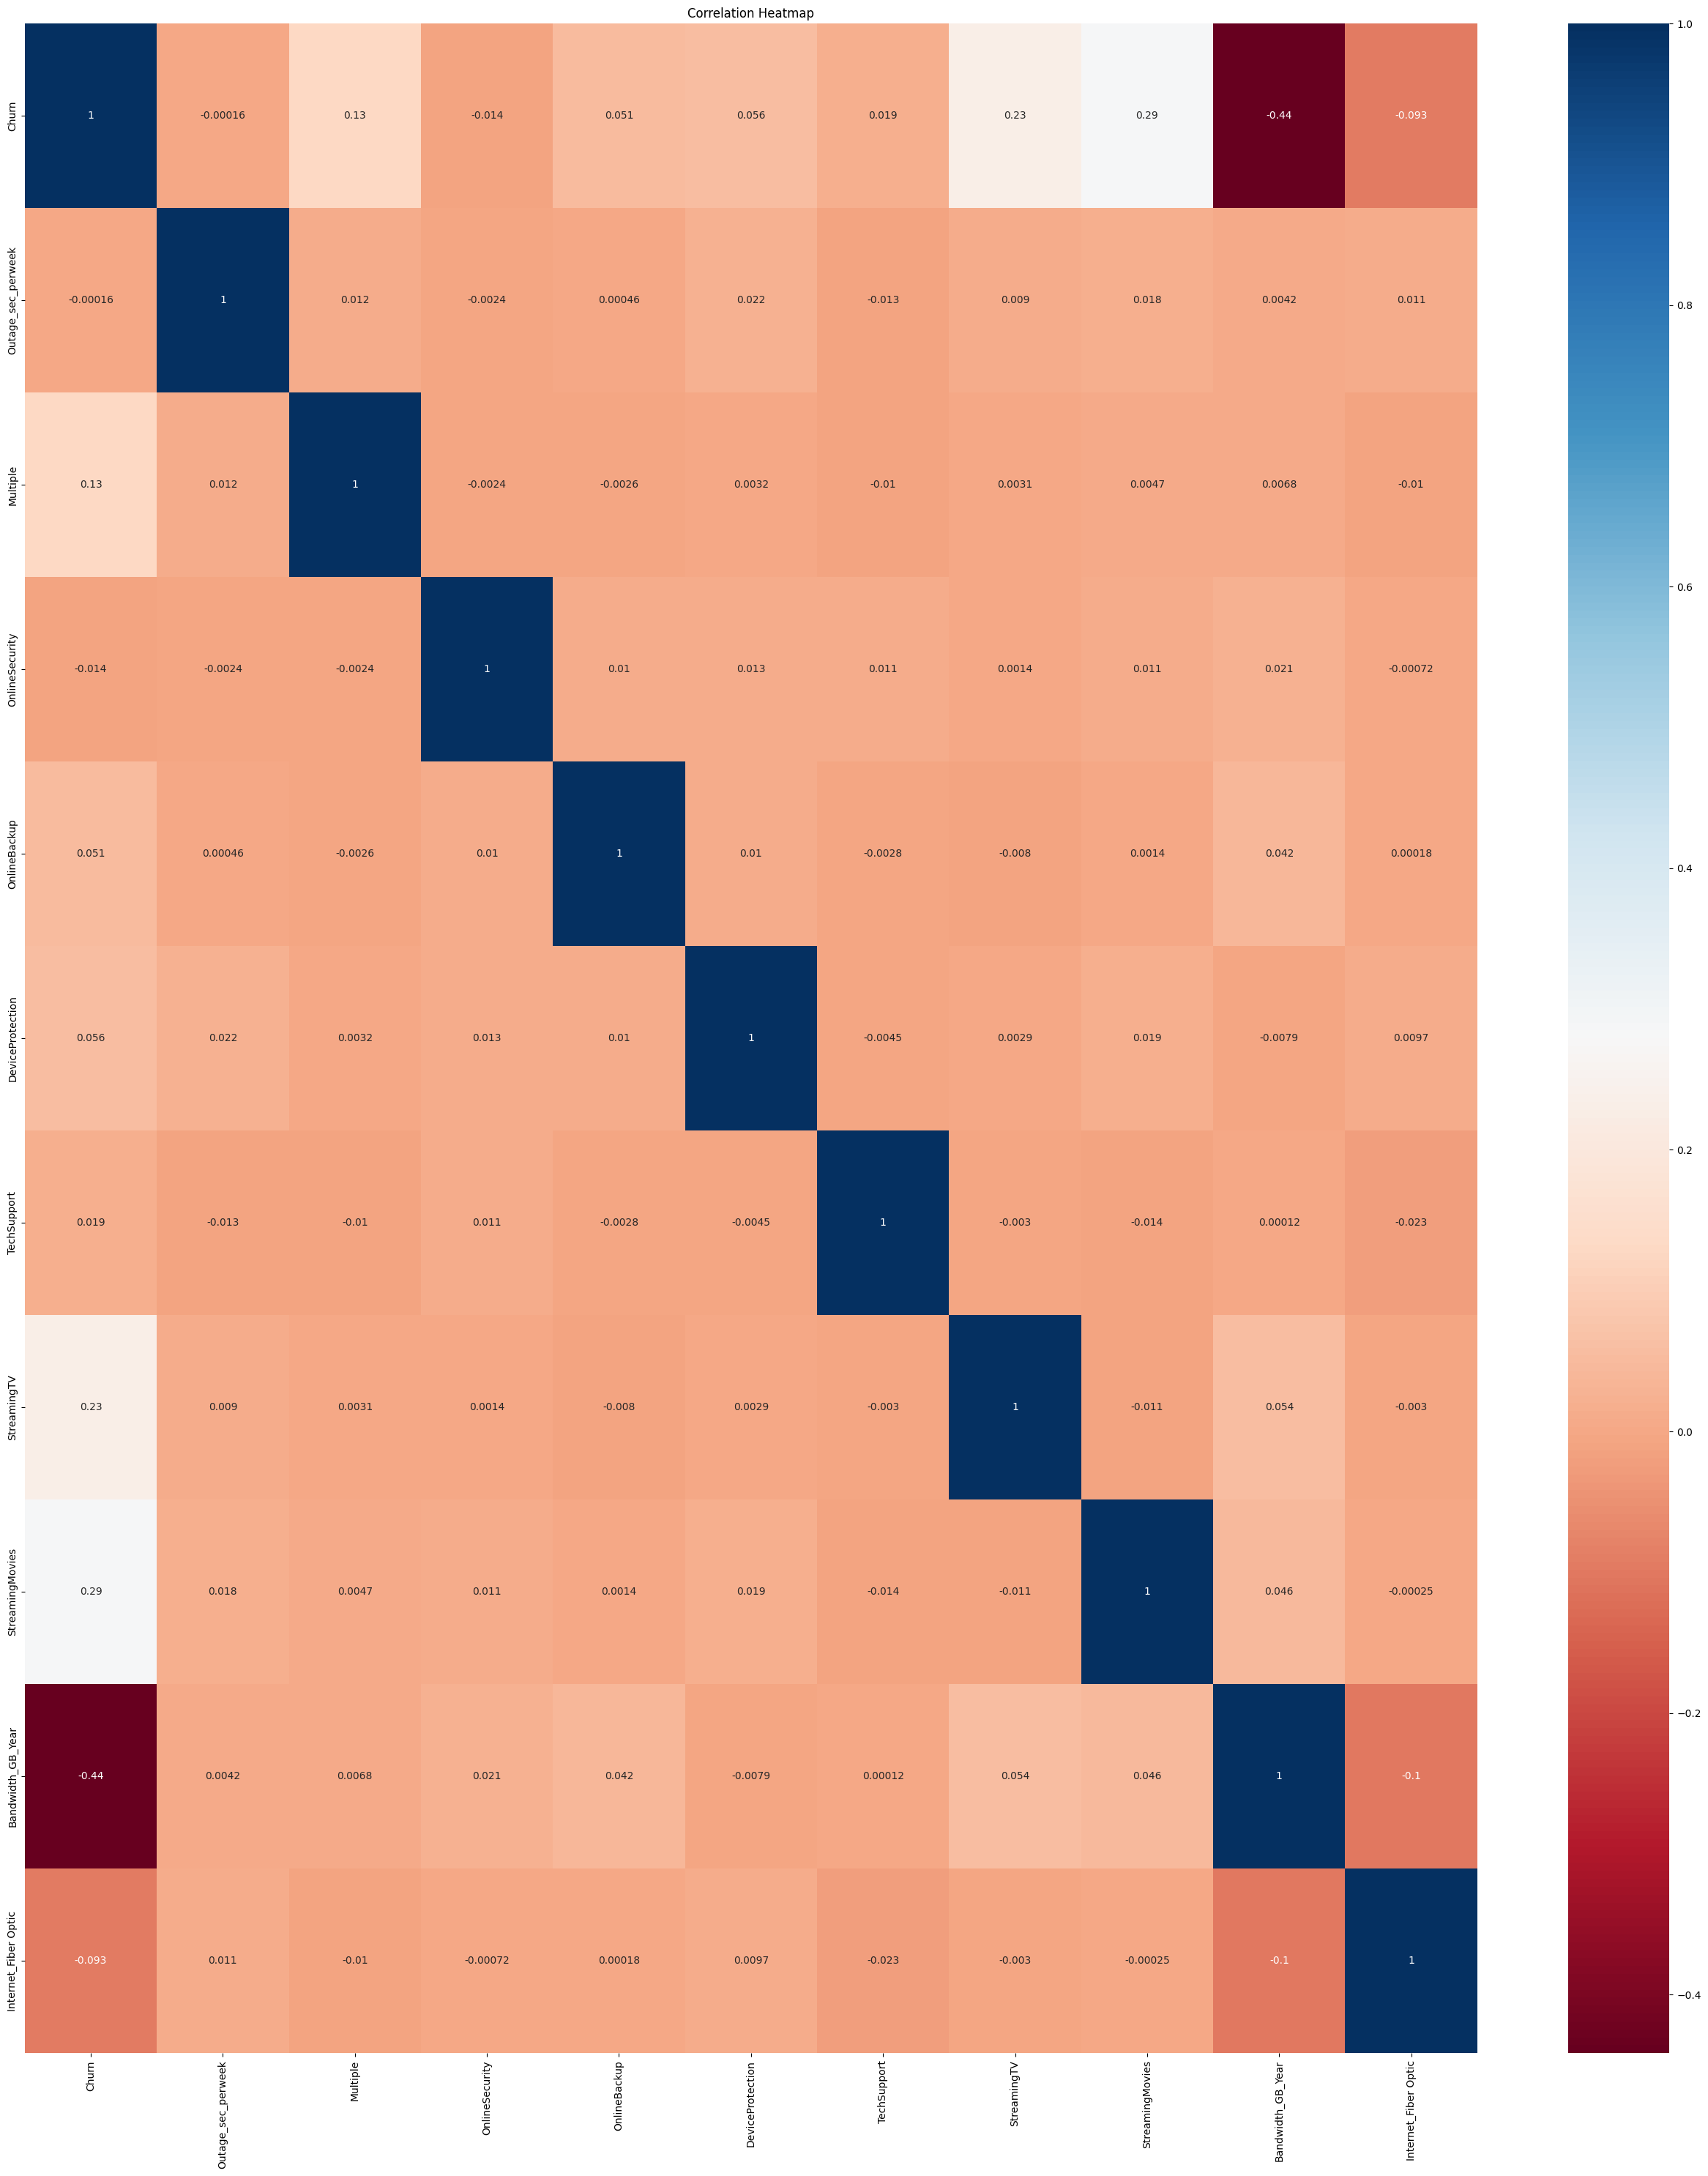

In [39]:
plt.subplots(figsize=(32,36))
sns.heatmap(X.corr(),annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

In [43]:
from sklearn.model_selection import train_test_split #split data

#split data into cross validation and holdout sets
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print(X_train.shape)
print(X_test.shape) 

(8000, 11)
(2000, 11)


# Part 2

In [36]:
from sklearn.ensemble import RandomForestRegressor #random forest model

#instantiate model
rf = RandomForestRegressor(random_state=0)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score #model metrics
from sklearn.metrics import make_scorer

#set up scoring
mse = make_scorer(mean_squared_error)
#Difference between predicted and actual values - lower error is better

In [38]:
from sklearn.model_selection import GridSearchCV #cross validation, hyperparameter tuning

#identify params to test n_estimators only
params = {'n_estimators': [10, 25, 100, 250, 500],
         }

#instantiate the grid search to find best 'n_estimators'
grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 3, scoring = mse, n_jobs = -1, verbose = 2, return_train_score=True)


In [39]:
#fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [10, 25, 100, 250, 500]},
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, response_method='predict'),
             verbose=2)

Text(0.5, 1.0, 'Training Time vs n_estimators')

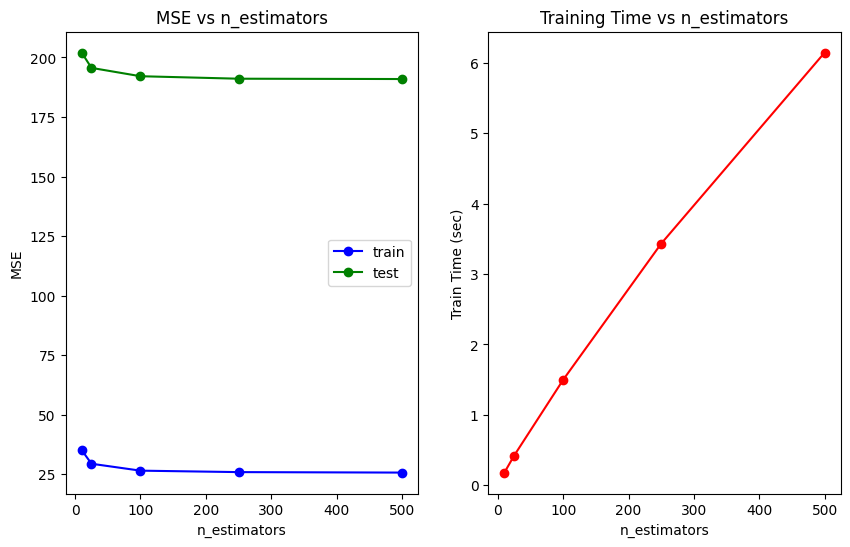

In [40]:
#build plot and subplots
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(list(grid_search.cv_results_['param_n_estimators']), grid_search.cv_results_['mean_train_score'], 'bo-', label = 'train')
plt.plot(list(grid_search.cv_results_['param_n_estimators']), grid_search.cv_results_['mean_test_score'], 'go-', label = 'test')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE vs n_estimators')
    
plt.subplot(122)
plt.plot(grid_search.cv_results_['param_n_estimators'], grid_search.cv_results_['mean_fit_time'], 'ro-')
plt.xlabel('n_estimators')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs n_estimators')

In [41]:
#identify params to test max features only
params2 = {'max_features': [1, 3, 5, 7, 11],
         }

#instantiate the grid search to find best 'max features'
grid_search2 = GridSearchCV(estimator = rf, param_grid = params2, 
                          cv = 3, scoring = mse, n_jobs = -1, verbose = 2, return_train_score=True)

#fit the model
grid_search2.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': [1, 3, 5, 7, 11]},
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, response_method='predict'),
             verbose=2)

Text(0.5, 1.0, 'Training Time vs max_features')

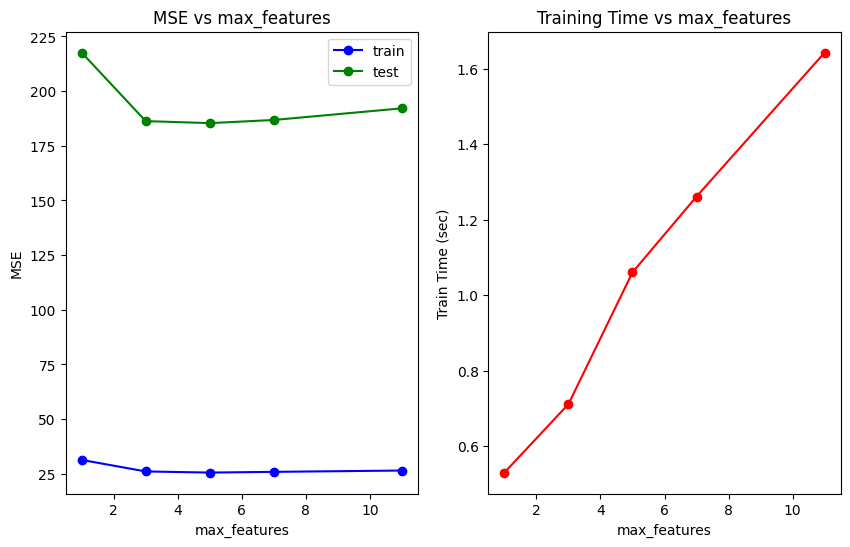

In [42]:
#build plot and subplots
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(list(grid_search2.cv_results_['param_max_features']), grid_search2.cv_results_['mean_train_score'], 'bo-', label = 'train')
plt.plot(list(grid_search2.cv_results_['param_max_features']), grid_search2.cv_results_['mean_test_score'], 'go-', label = 'test')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.title('MSE vs max_features')
    
plt.subplot(122)
plt.plot(grid_search2.cv_results_['param_max_features'], grid_search2.cv_results_['mean_fit_time'], 'ro-')
plt.xlabel('max_features')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs max_features')

In [43]:
from sklearn.impute import SimpleImputer #missingness imputation in pipeline

####now build pipeline to find best combined hyperparameters and perform cross validation after pipeline preprocessing is done

#Build pipeline and cross validate N_numbers w/ hyperparameter tuning
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='median')),
         ('rfr', RandomForestRegressor(random_state=0))]


In [44]:
from sklearn.pipeline import Pipeline #assemble steps

#instantiate pipeline
pipeline = Pipeline(steps)

#combined hyperparams
params = {'rfr__n_estimators': [100, 150, 200],
          'rfr__max_features': [5, 7, 9],
          'rfr__max_depth': [8, 10, 12]
         }

In [45]:
#Instantiate gridsearch with arguments that will
#perform cross validation on whatever the pipeline is fit to, 
#with a gridsearch for optimal parameters.  
cv = GridSearchCV(pipeline, param_grid=params, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2, return_train_score=True)

#apply the grid search cross validation to training set
cv.fit(X_train, y_train) #81 fits to process


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('rfr',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [8, 10, 12],
                         'rfr__max_features': [5, 7, 9],
                         'rfr__n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [46]:
#best parameters
cv.best_params_

{'rfr__max_depth': 8, 'rfr__max_features': 7, 'rfr__n_estimators': 200}

In [47]:
#view results
cv.cv_results_

{'mean_fit_time': array([0.78737402, 1.08640488, 1.41700522, 0.96468743, 1.37070394,
        1.8602922 , 1.14904547, 1.68306971, 2.38473996, 0.96510728,
        1.43337075, 1.81438422, 1.17311033, 1.68642767, 2.28236349,
        1.40900008, 2.11375268, 2.75991615, 1.17844979, 1.63541102,
        2.24136615, 1.35588352, 2.02857057, 2.4488914 , 1.54063034,
        2.06697575, 2.29310727]),
 'std_fit_time': array([0.02596696, 0.086428  , 0.01406106, 0.05937396, 0.03939033,
        0.06908983, 0.04767607, 0.02053721, 0.11198945, 0.08882837,
        0.08809796, 0.08643596, 0.02886548, 0.03251779, 0.09825884,
        0.08623425, 0.05743787, 0.02861234, 0.09641818, 0.06874941,
        0.03215979, 0.02722326, 0.07094241, 0.04594787, 0.02734002,
        0.01109426, 0.10274756]),
 'mean_score_time': array([0.04424294, 0.05641524, 0.0659349 , 0.03989879, 0.05225205,
        0.07128525, 0.04343152, 0.05443358, 0.07443055, 0.05208007,
        0.07263557, 0.08506203, 0.05043626, 0.0673124 , 0.104894

In [48]:
y_train_pred = cv.predict(X_train)
y_pred = cv.predict(X_test)

#r2 train
r2_score(y_train,y_train_pred)
#0.999994

#r2 test
r2_score(y_test,y_pred)

0.9132023182799274

In [49]:
# now review features that were most predictive
rfnew = RandomForestRegressor(n_estimators=200, max_features=9, max_depth=12,random_state=0)
model = rfnew.fit(X, y)
importances = list(model.feature_importances_)
X_list = list(X.columns)
X_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]
X_importances = sorted(X_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in X_importances]

Variable: StreamingMovies      Importance: 0.39
Variable: StreamingTV          Importance: 0.28
Variable: Multiple             Importance: 0.15
Variable: OnlineBackup         Importance: 0.07
Variable: Outage_sec_perweek   Importance: 0.02
Variable: DeviceProtection     Importance: 0.02
Variable: TechSupport          Importance: 0.02
Variable: Bandwidth_GB_Year    Importance: 0.02
Variable: Internet_Fiber Optic Importance: 0.01
Variable: Churn                Importance: 0.0
Variable: OnlineSecurity       Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None]